<a href="https://colab.research.google.com/github/davidperezaponte/OIBSIP/blob/main/Project3/t5_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import modules
!pip install opendatasets
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import opendatasets as od

In [ ]:
# Download of dataset

dataset_link = "https://www.kaggle.com/datasets/bumba5341/advertisingcsv"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: davidperez043
Your Kaggle Key: ··········


100%|██████████| 2.26k/2.26k [00:00<00:00, 1.08MB/s]

In [ ]:
# Identify the files in the directory
import os
os.chdir("advertisingcsv")
os.listdir()

['Advertising.csv']

In [ ]:
# Load of dataset
df = pd.read_csv("Advertising.csv")
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
# Check the number of registers
df.shape

(200, 5)

In [ ]:
# Types of the atributes
df.dtypes

Unnamed: 0      int64
TV            float64
Radio         float64
Newspaper     float64
Sales         float64
dtype: object

In [ ]:
# Centrality and deviation measure for numerical attributes
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,200.0,100.5000,57.879185,1.0,50.750,100.50,150.250,200.0
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [ ]:
# Verifcation of null values
df.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

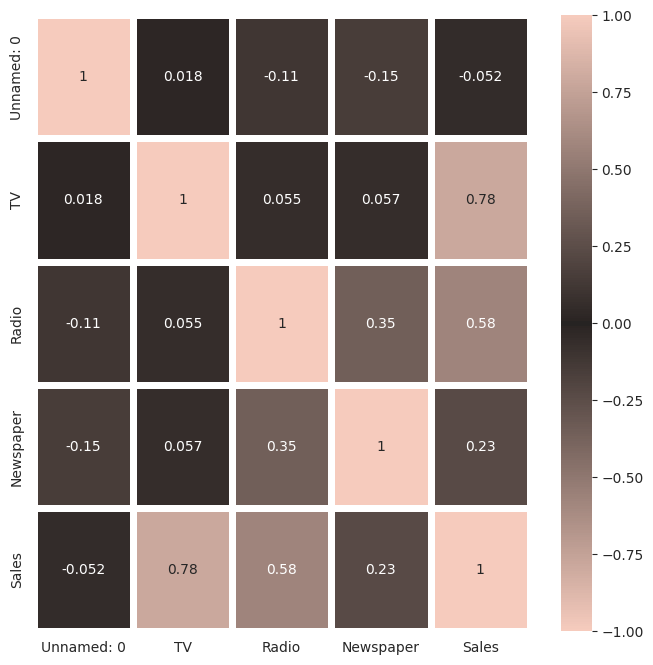

In [ ]:
# Correlation

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(df.corr(), annot=True, linewidths= 5, vmin=-1, vmax=1,cmap=sns.diverging_palette(30, 30, l=85, center="dark", as_cmap=True))

<ipython-input-16-0395809b898f>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop('Unnamed: 0',1).hist()


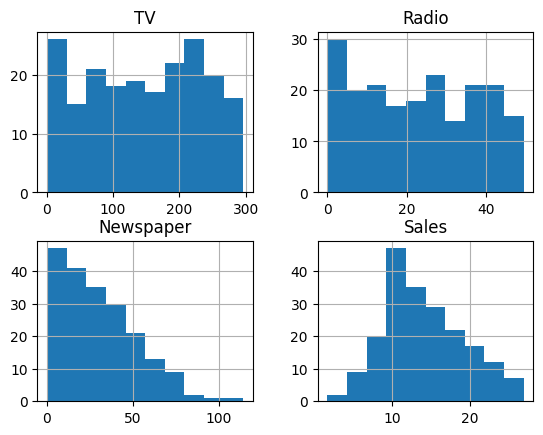

In [ ]:
# We visualize the input characteristics
df.drop('Unnamed: 0',1).hist()
plt.show()

# Multiple Linear Regression

In [ ]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression


# We define input and output
X_train = df.drop(['Unnamed: 0','Sales'], 1)
Y_train = df.Sales

# Model
model = LinearRegression()
model.fit(X_train, Y_train)

<ipython-input-19-8140b8abff7f>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train = df.drop(['Unnamed: 0','Sales'], 1)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# We make the prediction
pred = model.predict(X_train)

# The coefficients
print('Coefficients: \n', model.coef_)

# Mean square error
print("Mean squared error: %.2f" % mean_squared_error(Y_train, pred))

# This is the value where the Y axis intersects (at X=0)
print('Independent term: \n', model.intercept_)

# We evaluate the variance score (1.0 being the best possible)
print('Variance score: %.2f' % r2_score(Y_train, pred))

Coefficients: 
 [ 0.04576465  0.18853002 -0.00103749]
Mean squared error: 2.78
Independent term: 
 2.938889369459412
Variance score: 0.90


In [ ]:
# We make a prediction with the following values, TV= 200, Radio = 30, Newspaper = 10

# Create a DataFrame with the new values for prediction
new_data = pd.DataFrame({'TV': [200], 'Radio': [30], 'Newspaper': [10]})

# Make the prediction
prediction = model.predict(new_data)

# Print the prediction
print("Predicted Sales:", prediction[0])

Predicted Sales: 17.737344037660304


# Simple Linear Regression

In [ ]:
# Reshape the input feature for single-feature regression
X_train_s = df['TV'].values.reshape(-1, 1)
Y_train_s = df['Sales']

# Model
model_simple = LinearRegression()
model_simple.fit(X_train_s, Y_train_s)

LinearRegression()

In [ ]:
# We make the prediction
pred_simple = model_simple.predict(X_train_s)

# The coefficients
print('Coefficients: \n', model_simple.coef_)

# Mean square error
print("Mean squared error: %.2f" % mean_squared_error(Y_train_s, pred_simple))

# This is the value where the Y axis intersects (at X=0)
print('Independent term: \n', model.intercept_)

# We evaluate the variance score (1.0 being the best possible)
print('Variance score: %.2f' % r2_score(Y_train_s, pred_simple))

Coefficients: 
 [0.04753664]
Mean squared error: 10.51
Independent term: 
 2.938889369459412
Variance score: 0.61


In [ ]:
# Now, you can make predictions with new values for 'TV'
new_tv_value = 200
new_data = [[new_tv_value]]
prediction = model_simple.predict(new_data)

# Print the prediction
print("Predicted Sales with TV=", new_tv_value, ":", prediction[0])

Predicted Sales with TV= 200 : 16.539921635731645
